# Recognize MNIST Data using Keras

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
print(type(train_X), type(train_y), type(test_X), type(test_y))
print(test_X.shape, test_y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(10000, 28, 28) (10000,)


In [4]:
train_X = train_X.reshape((60000, 784))
train_X = train_X.astype('float32') / 255.

test_X = test_X.reshape((10000, 784))
test_X = test_X.astype('float32') / 255.

train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(60000, 784) (60000, 10) (10000, 784) (10000, 10)


## 모델 정의

In [5]:
model = tf.keras.models.Sequential()

**(input) Dense Layer**
- $784$ vector $\Rightarrow$ $512$ vector
- $h$ = ReLU
- params: $401\,920$
  - $\#W$: $784 \times 512 = 401\,408$
  - $\#b$: $512$

In [6]:
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784, )))

/opt/anaconda3/envs/ai-lecture-3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-16 20:10:32.277409: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-06-16 20:10:32.277433: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-06-16 20:10:32.277438: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-06-16 20:10:32.277456: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-16 20:10:32.277468: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271

**(output) Dense Layer**
- $512$ vector $\Rightarrow$ $10$ vector
- $h$ = $\sigma$
- params: $5\,130$
  - $\#W$: $512 \times 10 = 5\,120$
  - $\#b$: $10$

In [7]:
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [8]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

## 모델 사용 및 평가

In [10]:
from time import time
start = time()
history = model.fit(train_X, train_y, epochs=5, batch_size=128)
end = time()

Epoch 1/5


2024-06-16 20:10:32.714477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7877 - loss: 0.0416
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9275 - loss: 0.0137
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9432 - loss: 0.0105
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9536 - loss: 0.0087
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9600 - loss: 0.0075


In [11]:
print(f'Time: {end - start}')
loss, acc = model.evaluate(test_X, test_y)
print(f'Loss: {loss} / Accuracy: {acc}')

Time: 13.494752883911133
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9567 - loss: 0.0082
Loss: 0.006998271215707064 / Accuracy: 0.9634000062942505


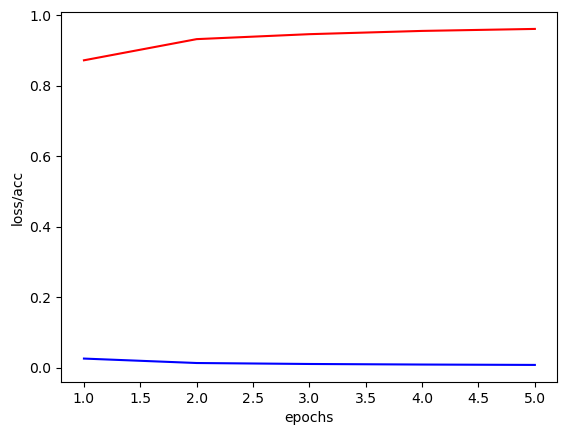

In [12]:
import matplotlib.pyplot as plt
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()

Correct: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted: 8 (value: [[0.00292503 0.03475657 0.00394435 0.00350107 0.00587136 0.07607605
  0.00844335 0.00088754 0.74203706 0.02380222]])


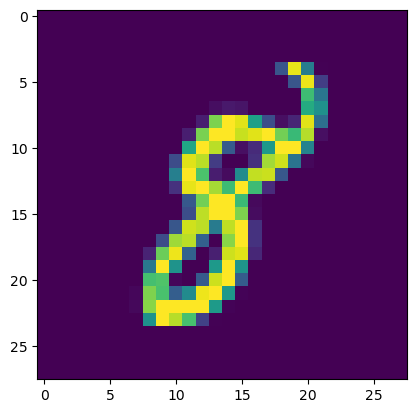

In [13]:
import numpy as np

index = np.random.choice(test_X.shape[0], 1)
image = test_X[index]
label = np.argmax(test_y[index])

print(f'Correct: {label}')
plt.imshow(image.reshape(28, 28) * 255)

pred = model.predict(image, batch_size=1)
print(f'Predicted: {pred.argmax()} (value: {pred})')